In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

# BUSINESS PROBLEM-1


#### BACKGROUND: The Lending Club is a peer-to-peer lending site where members make loans to each other. The site makes anonymized data on loans and borrowers publicly available.

### BUSINESS PROBLEM:
### Using lending club loans data, the team would like to test below hypothesis on how different factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

In [151]:
LoansData = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/4. Basic Statistics - Hypothesis Testing/LoansData.csv')
LoansData

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [152]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

#### interest rate column is object type we have to convert it into float type


In [153]:
LoansData.rename(columns = {'Interest.Rate': 'Interest_Rate'}, inplace = True)

In [154]:
LoansData['Interest_Rate'] = LoansData.Interest_Rate.str.replace('%','').astype(float)

In [155]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

### a. Interest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [156]:
LoansData['loan_amount_category'] = pd.cut(LoansData['Amount.Funded.By.Investors'], bins=3, labels=['low', 'medium', 'high'])
LoansData['loan_amount_category']

0       medium
1       medium
2         high
3          low
4       medium
         ...  
2495      high
2496    medium
2497       low
2498       low
2499       low
Name: loan_amount_category, Length: 2500, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [157]:
LoansData.groupby('loan_amount_category')['Interest_Rate'].mean()

loan_amount_category
low       12.099519
medium    13.685413
high      16.132519
Name: Interest_Rate, dtype: float64

In [158]:
LoansData.dropna(how = 'any',inplace = True)

In [159]:
# Annova Test
# Ho: There is no significant difference in interest rates across different loan amounts.
# Ha: There is  significant difference in interest rates across different loan amounts.
var = 'Interest_Rate'
sample1 = LoansData.loc[LoansData.loan_amount_category == 'low',var]
sample2 = LoansData.loc[LoansData.loan_amount_category == 'medium',var]
sample3 = LoansData.loc[LoansData.loan_amount_category == 'high',var]

result = stats.f_oneway(sample1,sample2,sample3)
print(result)

F_onewayResult(statistic=122.11495138077662, pvalue=3.0520976316304085e-51)


In [160]:
alpha = 0.05
if result[1] > alpha:
    print("Fail to reject the null hypothesis!!!")
else:
    print("Reject the null hypotheis!!!")

Reject the null hypotheis!!!


<div class="alert alert-block alert-warning"><b>Conclusion:</b> Give the sample data, we can say with 95% confidence that There is  significant difference in interest rates across different loan amounts.Hence, There is a relationship between Interest Rate and Loan Amount requested. Higher loan amounts has low interest rate & vice versa.</div>

### b. Loan length is directly effecting intrest rate.

In [161]:
LoansData.rename(columns = {'Loan.Length': 'loan_length_months'}, inplace = True)

In [162]:
LoansData['loan_length_months'] = LoansData.loan_length_months.str.replace('months','').astype(int)

In [163]:
LoansData['loan_length_months']

0       36
1       36
2       60
3       36
4       36
        ..
2495    60
2496    60
2497    36
2498    36
2499    36
Name: loan_length_months, Length: 2413, dtype: int64

In [164]:
LoansData['loan_length_category'] = pd.cut(LoansData['loan_length_months'], bins=2, labels=['short','long'])
LoansData['loan_length_category']

0       short
1       short
2        long
3       short
4       short
        ...  
2495     long
2496     long
2497    short
2498    short
2499    short
Name: loan_length_category, Length: 2413, dtype: category
Categories (2, object): ['short' < 'long']

In [165]:
LoansData.groupby('loan_length_category')['Interest_Rate'].mean()

loan_length_category
short    12.130075
long     16.378734
Name: Interest_Rate, dtype: float64

In [166]:
# inpendent tTest
# Ho: Loan length is not effecting intrest rate. 
# Ha: Loan length is effecting intrest rate.
var = 'Interest_Rate'
sample1 = LoansData.loc[LoansData.loan_length_category == 'short',var]
sample2 = LoansData.loc[LoansData.loan_length_category == 'long',var]
result = stats.ttest_ind(sample1,sample2)
print(result)

TtestResult(statistic=-23.05779328482699, pvalue=1.79380106734165e-106, df=2411.0)


In [167]:
alpha = 0.05
if result[1] > alpha:
    print("Fail to reject the null hypothesis!!!")
else:
    print("Reject the null hypotheis!!!")

Reject the null hypotheis!!!


<div class="alert alert-block alert-warning"><b>Conclusion:</b> Given the sample, we can say with 95% confidence loan length is effecting interest rates.Hence, Loan length is directly effecting interest rate. For longer loan length, interset rate is low and vice- versa.</div>

### c. Interest rate varies for different purpose of loans

In [168]:
LoansData

,Amount.Requested,Amount.Funded.By.Investors,Interest_Rate,loan_length_months,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,loan_amount_category,loan_length_category
0,20000.0,20000.00,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,medium,short
1,19200.0,19200.00,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,medium,short
2,35000.0,35000.00,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,high,long
3,10000.0,9975.00,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,low,short
4,12000.0,12000.00,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,medium,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years,high,long
2496,16000.0,16000.00,14.09,60,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years,medium,long
2497,10000.0,10000.00,13.99,36,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years,low,short
2498,6000.0,6000.00,12.42,36,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years,low,short


In [169]:
loan_purpose_category = LoansData['Loan.Purpose'].unique()
print(loan_purpose_category)

['debt_consolidation' 'credit_card' 'other' 'moving' 'car' 'vacation'
 'home_improvement' 'house' 'major_purchase' 'educational' 'medical'
 'wedding' 'small_business' 'renewable_energy']


In [170]:
data = [LoansData[LoansData['Loan.Purpose'] == category]['Interest_Rate'] for category in loan_purpose_category]
data

[0        8.90
 1       12.12
 2       21.98
 3        9.99
 6        7.90
         ...  
 2481     6.62
 2485    10.75
 2495    16.77
 2497    13.99
 2499    13.79
 Name: Interest_Rate, Length: 1262, dtype: float64,
 4       11.71
 7       17.14
 8       14.33
 9        6.91
 18       9.76
         ...  
 2460    14.09
 2463     7.90
 2467     7.29
 2476    14.09
 2478    11.71
 Name: Interest_Rate, Length: 430, dtype: float64,
 5       15.31
 28       8.59
 48       7.49
 51      17.44
 57       9.99
         ...  
 2443    14.59
 2450    14.79
 2468     7.29
 2486    17.27
 2493    23.28
 Name: Interest_Rate, Length: 189, dtype: float64,
 10      19.72
 195      6.17
 209     13.11
 228     24.89
 349     10.99
 435      5.79
 497     12.21
 524     14.84
 659     14.33
 756     15.31
 1046    11.71
 1152     6.76
 1183    11.83
 1347    12.68
 1420    10.75
 1711    19.05
 1729     7.88
 1870    10.38
 1929    23.76
 1960    14.65
 1974    17.49
 2082    15.31
 2106    14.83
 2167 

In [171]:
# ANOVA TEST
# Ho: Interest rate not varies for different purpose of loans
# Ha: Interest rate varies for different purpose of loans
result = stats.f_oneway(*data)
print(result)

F_onewayResult(statistic=7.330838185919651, pvalue=2.7646672581411367e-14)


In [172]:
alpha = 0.05
if result[1] > alpha:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-block alert-warning"><b>Conclusion:</b> Give the sample, we can say with 95% confidence that Interest rate varies for different purpose of loans.Hence, Interest Rates vary for different purposes of loans.</div>

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores

In [173]:
LoansData

,Amount.Requested,Amount.Funded.By.Investors,Interest_Rate,loan_length_months,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,loan_amount_category,loan_length_category
0,20000.0,20000.00,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,medium,short
1,19200.0,19200.00,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,medium,short
2,35000.0,35000.00,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,high,long
3,10000.0,9975.00,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,low,short
4,12000.0,12000.00,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,medium,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77,60,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years,high,long
2496,16000.0,16000.00,14.09,60,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years,medium,long
2497,10000.0,10000.00,13.99,36,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years,low,short
2498,6000.0,6000.00,12.42,36,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years,low,short


In [174]:
LoansData['FICO.Range'].unique()

array(['735-739', '715-719', '690-694', '695-699', '670-674', '720-724',
       '705-709', '685-689', '665-669', '725-729', '730-734', '740-744',
       '760-764', '675-679', '765-769', '780-784', '830-834', '660-664',
       '710-714', '785-789', '750-754', '700-704', '680-684', '755-759',
       '790-794', '810-814', '775-779', '745-749', '805-809', '800-804',
       '655-659', '770-774', '795-799', '640-644', '645-649', '815-819',
       '820-824', '650-654'], dtype=object)

In [175]:
LoansData[['fico_range_low', 'fico_range_high']] = LoansData['FICO.Range'].str.split('-', expand=True).astype(int)

In [176]:
LoansData[['fico_range_low', 'fico_range_high']]

,fico_range_low,fico_range_high
0,735,739
1,715,719
2,690,694
3,695,699
4,695,699
...,...,...
2495,705,709
2496,740,744
2497,680,684
2498,675,679


In [177]:
LoansData['fico_range_low'] = LoansData['fico_range_low'].astype(int)

In [178]:
LoansData['fico_range_high'] = LoansData['fico_range_high'].astype(int)

In [179]:
LoansData['fico_scores'] = (LoansData.fico_range_low + LoansData.fico_range_high)/2

In [180]:
LoansData['fico_scores']

0       737.0
1       717.0
2       692.0
3       697.0
4       697.0
        ...  
2495    707.0
2496    742.0
2497    682.0
2498    677.0
2499    672.0
Name: fico_scores, Length: 2413, dtype: float64

In [181]:
home_ownership = LoansData['Home.Ownership'].unique()
home_ownership

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

In [182]:
data = [LoansData[LoansData['Home.Ownership'] == category]['fico_scores'] for category in home_ownership]
data

[0       737.0
 1       717.0
 2       692.0
 3       697.0
 7       707.0
         ...  
 2483    677.0
 2485    767.0
 2493    677.0
 2495    707.0
 2497    682.0
 Name: fico_scores, Length: 1109, dtype: float64,
 4       697.0
 6       722.0
 8       687.0
 9       717.0
 10      672.0
         ...  
 2474    662.0
 2475    677.0
 2480    762.0
 2498    677.0
 2499    672.0
 Name: fico_scores, Length: 1110, dtype: float64,
 5       672.0
 34      677.0
 54      682.0
 59      757.0
 73      667.0
         ...  
 2438    687.0
 2456    712.0
 2466    672.0
 2486    667.0
 2496    742.0
 Name: fico_scores, Length: 189, dtype: float64,
 294     657.0
 978     677.0
 1484    682.0
 2102    672.0
 2418    682.0
 Name: fico_scores, dtype: float64]

In [183]:
# ANOVA TEST
# Ho: There is no relationship between FICO scores and Home Ownership. It means that, 
#     People who owns home will have high FICO scores
# Ha: There is relationship between FICO scores and Home Ownership. It means that, 
#     People who owns home will have high FICO scores
result = stats.f_oneway(*data)
print(result)

F_onewayResult(statistic=20.65464665222211, pvalue=3.2682005447315283e-13)


In [184]:
aplha = 0.05
if result[1] > alpha:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-block alert-warning"><b>Conclusion:</b> Given the sample, we can say with 95% confidence that There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores. </div>

# BUSINESS PROBLEM - 2

#### BACKGROUND: When an order is placed by a customer of a small manufacturing company, a price quote must be developed for that order. Because each order is unique, quotes must be established on an order-by-order basis by a pricing expert. The price quote process is labor-intensive, as prices depend on many factors such as the part number, customer, geographic location, market, and order volume. The sales department manager is concerned that the pricing process is too complex, and that there might be too much variability in the quoted prices. An improvement team is tasked with studying and improving the pricing process. 
#### After interviewing experts to develop a better understanding of the current process, the team designed a study to determine if there is variability between pricing experts. That is, do different pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and Barry, were asked to independently provide prices for twelve randomly selected orders. Each expert provided one price for each of the twelve orders.

### BUSINESS PROBLEM: 
### We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

In [185]:
Price_Quotes = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/4. Basic Statistics - Hypothesis Testing/Price_Quotes.csv')
Price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [186]:
Price_Quotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Order_Number  12 non-null     int64
 1   Barry_Price   12 non-null     int64
 2   Mary_Price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [187]:
mary_price = Price_Quotes.Mary_Price
barry_price = Price_Quotes.Barry_Price
print(mary_price)
print(barry_price)

0     114
1     118
2     114
3     111
4     129
5     119
6      97
7     104
8     127
9     133
10    103
11    108
Name: Mary_Price, dtype: int64
0     126
1     110
2     138
3     142
4     146
5     136
6      94
7     103
8     140
9     152
10    108
11     97
Name: Barry_Price, dtype: int64


In [188]:
# relative tTest
# Ho:  there is no difference in the average price quotes provided by Mary and Barry. mean1 = mean2
# Ha:  there is a difference in the average price quotes provided by Mary and Barry. mean <> mean2
result = stats.ttest_rel(mary_price,barry_price)
print(result)

TtestResult(statistic=-2.5213765108923494, pvalue=0.02840588045242053, df=11)


In [189]:
aplha = 0.05
if result[1] > alpha:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-block alert-warning"><b>Conclusion:</b> Given the sample, we can say with 95% confidence that there is a difference in average price quotes provided by Marry and Barry </div>

# BUSINESS PROBLEM-3:

#### BACKGROUND: The New Life Residential Treatment Facility is a NGO that treats teenagers who have shown signs of mental illness. It provides housing and supervision of teenagers who are making the transition from psychiatric hospitals back into the community. Because many of the teenagers were severely abused as children and have been involved with the juvenile justice system, behavioral problems are common at New Life. Employee pay is low and staff turnover (attrition) is high. A reengineering program was instituted at New Life with the goals of lowering behavioral problems of the kids and decreasing employee turnover rates. As a part of this effort, the following changes were made:
####  Employee shifts were shortened from 10 hours to 8 hours each day.
####  Employees were motivated to become more involved in patient treatments. This included encouraging staff to run various therapeutic treatment sessions and allowing staff to have more say in program changes.
####  The activities budget was increased.
####  A facility-wide performance evaluation system was put into place that rewarded staff participation and innovation.
####  Management and staff instituted a program designed to raise expectations about appropriate behavior from the kids. This included strict compliance with reporting of behavioral violations, insistence on participation in therapeutic sessions, and a lowered tolerance for even moderate behavioral infractions.

#### To determine the effectiveness of the reengineering effort, a data set comprised of pre- and post-reengineering periods was compiled. The information contains two measures of behavioral problems. A critical incident occurs when a resident goes AWOL (leaves the premises without permission), destroys property (e.g., punching a hole in a wall or throwing furniture through windows), is caught in possession of street drugs, or engages in assault against other residents or staff members. A teenager is temporarily removed from the facility when s/he is sent to jail or back to a psychiatric hospital

### BUSINESS PROBLEM: 
### Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

In [190]:
Treatment_Facility = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/4. Basic Statistics - Hypothesis Testing/Treatment_Facility.csv')
Treatment_Facility.rename(columns = {'VAR4' : 'TRFF%', 'VAR5' : 'CI%'},inplace = True)
Treatment_Facility

,Month,Reengineer,Employee_Turnover,TRFF%,CI%
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [191]:
# indepent ttest
# Ho: The reengineering effort did not change the critical incidence rate.
# Ha: The reengineering effort improved the critical incidence rate.
var1 = 'CI%'
sample1 = Treatment_Facility.loc[:12, var1]
sample2 = Treatment_Facility.loc[13:, var1]
print(sample1)
print(sample2)

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CI%, dtype: float64
13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CI%, dtype: float64


In [192]:
result = stats.ttest_ind(sample1,sample2)
print(result)

TtestResult(statistic=1.627914425352865, pvalue=0.12091989189884148, df=18.0)


In [193]:
aplha = 0.05
if result[1] * 2 > alpha:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Fail to reject the null hypothesis


### Give the sample ,we can say with 95% that there is no evidence that the critical incidence rate improved.

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Given the sample, we can say with 95% confidence that there is no evidence that the critical incidence rate improved and Re-engineering effort has increased the CI%. </div>

# BUSINESS PROBLEM 4:

#### BACKGROUND: Software development projects typically follow six basic phases: Requirements, design, implementation (and integration), testing (validation), deployment (installation) andmaintenance. First, general requirements are gathered, and the scope of the functionality is defined. Then, alternative scenarios for the required functionality are developed andevaluated. Implementation, usually 50% or more of the development time, is the phase in which the design is translated into programs and integrated with other parts of the software – this is when software engineers actually develop the code. During the final phases, programs are tested, software is put into use, and faults or performance issues are addressed.

#### ApDudes, a developer of applications for tablet computers, was having difficulty meeting project deadlines; only 10% of their projects had been completed within budget and on time last year and that was starting to hurt business. The group’s project manager was tasked with studying problems within the implementation phase. He found that software engineers were having difficulty prioritizing their work, and that they often became overwhelmed by the magnitude of the projects.

#### As a result, two changes were made. Each project was broken down into smaller, distinct tasks, or jobs, and each job was assigned a priority. The project manager believes that this classification and prioritization system would speed the completion of high priority jobs, and thus lower overall project completion time

### BUSINESS PROBLEM: 
### We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring

In [194]:
Priority_Assessment = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/4. Basic Statistics - Hypothesis Testing/Priority_Assessment.csv')
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [195]:
Priority_Assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [196]:
priority_category = Priority_Assessment['Priority'].unique()
print(priority_category)

['High' 'Medium' 'Low']


In [197]:
data = [Priority_Assessment[Priority_Assessment['Priority'] == category]['Days'] for category in priority_category]
data

[0      3.3
 2      0.3
 5      0.3
 6      0.3
 7      0.3
       ... 
 631    0.3
 632    1.0
 635    0.1
 638    0.3
 641    0.5
 Name: Days, Length: 326, dtype: float64,
 1       7.9
 3       0.7
 4       8.6
 9      15.9
 11      0.3
        ... 
 633     2.0
 634     2.5
 636     0.1
 639     0.3
 640     1.3
 Name: Days, Length: 249, dtype: float64,
 14     23.2
 15      5.3
 20      4.6
 23      1.8
 26     17.0
        ... 
 609     0.5
 613     7.9
 620     0.3
 622     0.1
 637     2.5
 Name: Days, Length: 67, dtype: float64]

In [198]:
# ANOVA TEST
# Null Hypothesis (Ho): There is no difference in the average completion times between high, medium, and low priority jobs.
# Alternative Hypothesis (Ha): At least one pair of priority levels has a significantly different average completion time.
result = stats.f_oneway(*data)
print(result)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)


In [199]:
aplha = 0.05
if result[1]  > alpha:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Fail to reject the null hypothesis


<div class="alert alert-block alert-warning"><b>Conclusion:</b> Given the sample, we can say with 95% confidence that there is no evidence that the prioritization system is working as inteded. </div>

# BUSINESS PROBLEM-5

#### BackGround: Film on the Rocks is a summer movie series held at the world-renowned Red Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison, Colorado fifteen miles west of Denver. The film series features classic films, and pre-show entertainment including bands and comedians. Among the features that have made Red Rocks an internationally-famous concert stage are sweeping views of Denver, outstanding acoustics, and cool, dry Colorado summers.

#### The series is jointly promoted by the Denver Film Society (DFS) and the City and County of Denver’s Division of Theatres and Arenas (DT&A). It is marketed through various outlets including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate funds that keep ticket prices low.

#### Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue, there are tradeoffs. Red Rocks is a farther commute for most people than the local movie theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot, getting there can be challenging. And, as an outdoor venue, the viewing experience is dependent on the weather.

#### Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But, the series promoters would also like to increase attendance at the film series, and are unsure how to do this. Promoters recognize that they need a better understanding of the customer base, and of the current level of satisfaction. Knowing the demographics of those who attendthe film series will help attract and expand corporate sponsorship. In addition, knowing which media outlets are most effective will provideinformation about how best to target future marketing campaigns.

#### To this end, the promoters conducted surveys during a recent Film on the Rocks season. Questionnaires were handed out at the entrance. Volunteers walked through the crowd to remind people about the free soft drink given to those who returned the survey.

### BUSINESS PROBLEM: Use the survey results to address the following questions

### a) What is the overall level of customer satisfaction?

In [258]:
films = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/4. Basic Statistics - Hypothesis Testing/Films.csv')
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [259]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [260]:
mode_values = films.mode().iloc[0]

In [261]:
# Fill NaN values with the mode value for each column
films = films.fillna(mode_values)

In [262]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  330 non-null    object 
 4   Sinage          330 non-null    float64
 5   Parking         330 non-null    float64
 6   Clean           330 non-null    float64
 7   Overall         330 non-null    float64
 8   Age             330 non-null    float64
 9   Income          330 non-null    float64
 10  Hear_About      330 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [263]:
films.head(15)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
5,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,5
6,0,Ferris Buellers Day Off,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
7,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,3.0,1.0,3.0,1.0,4
8,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,3.0,1.0,3.0,1.0,4
9,0,Ferris Buellers Day Off,Female,Single,2.0,3.0,2.0,2.0,3.0,1.0,4


In [264]:
films['Overall'] = films.Overall.astype(int)

In [265]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  330 non-null    object 
 4   Sinage          330 non-null    float64
 5   Parking         330 non-null    float64
 6   Clean           330 non-null    float64
 7   Overall         330 non-null    int64  
 8   Age             330 non-null    float64
 9   Income          330 non-null    float64
 10  Hear_About      330 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 28.5+ KB


In [289]:
reverse_mapping = {'Excellent': 1, 'Good': 2, 'Average/Fair': 3, 'Poor': 4, 'Very Poor': 5}
films['Overall_numeric'] = films['Overall'].map(reverse_mapping)
films['Overall_numeric']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
325   NaN
326   NaN
327   NaN
328   NaN
329   NaN
Name: Overall_numeric, Length: 330, dtype: float64

In [290]:
films['Overall'].value_counts()

Overall
2.0    162
1.0    151
3.0     12
5.0      4
4.0      1
Name: count, dtype: int64

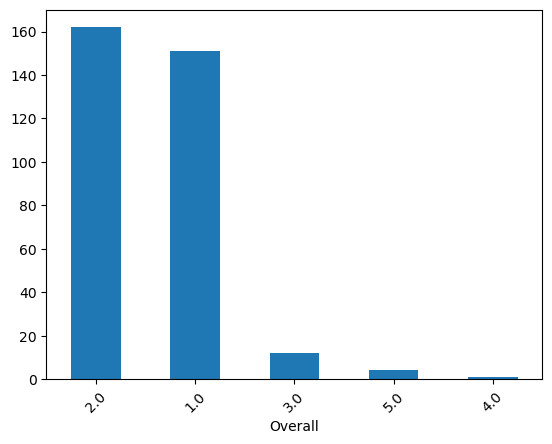

In [291]:
films['Overall'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show()

### b) What factors are linked to satisfaction?

In [292]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About,Overall_numeric
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,Word of mouth,NaN
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,Word of mouth,NaN
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,Word of mouth,NaN
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,Word of mouth,NaN
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,Television,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,Television,NaN
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,Word of mouth,NaN
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,Word of mouth,NaN
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,Radio,NaN


In [293]:
data = films[['Sinage','Parking','Clean','Overall']].corr()
data

,Sinage,Parking,Clean,Overall
Sinage,1.000000,0.469180,0.349144,0.382103
Parking,0.469180,1.000000,0.440771,0.514429
Clean,0.349144,0.440771,1.000000,0.350822
Overall,0.382103,0.514429,0.350822,1.000000


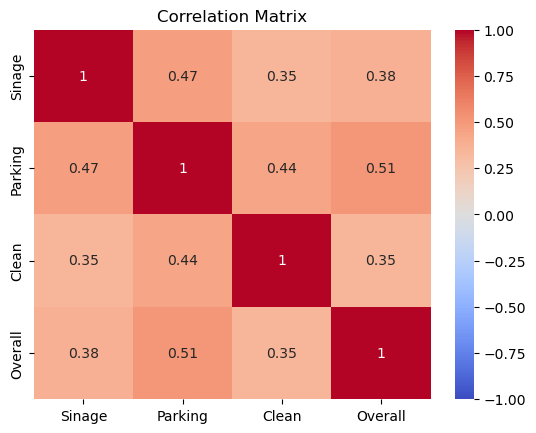

In [294]:
sns.heatmap(data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### c) What is the demographic profile of Film on the Rocks patrons?

In [295]:
films = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/4. Basic Statistics - Hypothesis Testing/Films.csv')
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [296]:
films['Gender'] = films['Gender'].replace({'2':'Female', '1': 'Male'})

In [297]:
films['Gender']

0      Female
1      Female
2        Male
3      Female
4      Female
        ...  
325    Female
326      Male
327    Female
328      Male
329    Female
Name: Gender, Length: 330, dtype: object

In [298]:
films['Marital_Status'] = films['Marital_Status'].replace({'1': 'Married', '2': 'Single'})
films['Marital_Status']

0      Married
1       Single
2      Married
3      Married
4      Married
        ...   
325     Single
326    Married
327    Married
328    Married
329     Single
Name: Marital_Status, Length: 330, dtype: object

In [299]:
films['Age'] = films['Age'].map({1.0: '1-12', 2.0: '13-30', 3.0: '31-60', 4.0: '60+'})
films['Age']

0      31-60
1      13-30
2        60+
3        60+
4      31-60
       ...  
325    13-30
326    31-60
327    13-30
328    13-30
329    13-30
Name: Age, Length: 330, dtype: object

In [300]:
films['Income'] = films['Income'].replace({1.0: '< $50,000', 2.0: '$50-$100,000', 3.0: '$100,000+'})
films['Income']

0         < $50,000
1         < $50,000
2         < $50,000
3         < $50,000
4         $100,000+
           ...     
325       < $50,000
326       $100,000+
327    $50-$100,000
328       < $50,000
329       < $50,000
Name: Income, Length: 330, dtype: object

In [301]:
# Calculate summary statistics for each demographic variable
gender_stats = films['Gender'].value_counts()
marital_stats = films['Marital_Status'].value_counts()
age_stats = films['Age'].value_counts()
income_stats = films['Income'].value_counts()

# Print the summary statistics
print("Gender:")
print(gender_stats)
print("\nMarital Status:")
print(marital_stats)
print("\nAge:")
print(age_stats)
print("\nIncome:")
print(income_stats)

Gender:
Gender
Female    213
Male      117
Name: count, dtype: int64

Marital Status:
Marital_Status
Single     226
Married    100
Slngle       2
Name: count, dtype: int64

Age:
Age
13-30    175
31-60    117
1-12      26
60+       10
Name: count, dtype: int64

Income:
Income
< $50,000       142
$100,000+        90
$50-$100,000     82
Name: count, dtype: int64


### d) In what media outlet(s) should the film series be advertised?

In [302]:
films = pd.read_csv('/Users/akki-23/Desktop/Python Programming/Analytix/4. Basic Statistics - Hypothesis Testing/Films.csv')
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [303]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [304]:
mode_values = films.mode().iloc[0]

# Fill NaN values with the mode value for each column
films = films.fillna(mode_values)

In [305]:
films['Hear_About'] = films['Hear_About'].str.replace(',','').astype(int)

In [306]:
films['Hear_About'] = films['Hear_About'].map({1:'Television',2:'Newspaper',3:'Radio',4:'Website',5:'Word of mouth'})

In [307]:
films['Hear_About']

0      Word of mouth
1      Word of mouth
2      Word of mouth
3      Word of mouth
4         Television
           ...      
325       Television
326    Word of mouth
327    Word of mouth
328            Radio
329    Word of mouth
Name: Hear_About, Length: 330, dtype: object

In [308]:
films['Hear_About'].value_counts()

Hear_About
Word of mouth    233
Website           41
Television        22
Radio             14
Newspaper         12
Name: count, dtype: int64

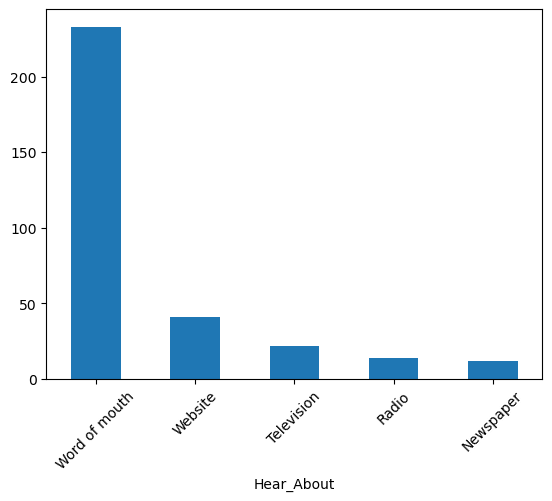

In [309]:
films['Hear_About'].value_counts().plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-warning"><b>Conclusion:</b> Word of Mouth was the main channel through which people got to know about the film series, followed by website, television and radio. </div>